# Obtendo dados de ações automaticamente
- Cenário:
    - Você trabalha em uma empresa de investimentos e todos os dias precisa enviar um e-mail com o valor da cotação de uma determinada ação. O e-mail precisa conter as informações dos últimos seis meses:
        - Cotação mínima da ação
        - Cotação máxima da ação
        - Cotação do dia

## Importando as bibliotecas
- caso não tenha as bibliotecas, para instalar:
    - `!pip install yfinance`
    - `!pip install pyautogui`
    - `!pip install pyperclip`
   

In [1]:
import yfinance
import pyautogui
import pyperclip

## Buscando as cotações de uma Ação
- **Ticker:** Código de uma ação

In [2]:
# Entrada do usuário
codigo_acao = input("Digite o código da ação: ")
dados = yfinance.Ticker(codigo_acao)

Digite o código da ação: PETR4.SA


### Configurando o período histórico de uma ação
- **Ano:** y
- **Mês:** mo
- **Dia:** d

In [3]:
# Buscando o período de seis meses
tabela = dados.history("6mo")

# Imprimindo os dados
tabela

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-20 00:00:00-03:00,21.339238,21.709375,21.154170,21.476028,54738400,0.0,0.0
2023-04-24 00:00:00-03:00,21.403610,21.934677,21.323145,21.886398,43820900,0.0,0.0
2023-04-25 00:00:00-03:00,21.854213,22.127793,21.500168,21.797888,53854100,0.0,0.0
2023-04-26 00:00:00-03:00,21.822025,21.902489,21.524305,21.524305,40249400,0.0,0.0
2023-04-27 00:00:00-03:00,21.604773,21.870306,20.848404,21.001287,115632700,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-16 00:00:00-03:00,36.400002,36.799999,35.959999,36.680000,49626600,0.0,0.0
2023-10-17 00:00:00-03:00,36.700001,37.669998,36.630001,37.669998,68814800,0.0,0.0
2023-10-18 00:00:00-03:00,37.990002,38.610001,37.910000,38.520000,85931700,0.0,0.0


### Selecionando apenas a coluna de Fechamento (close)
- Para selecionar a coluna desejada, basta colocar o nome dela entre colchetes na frente da variável que está armazenando os dados

In [4]:
coluna_fechamento = tabela.Close

# Imprimindo os dados
coluna_fechamento

Date
2023-04-20 00:00:00-03:00    21.476028
2023-04-24 00:00:00-03:00    21.886398
2023-04-25 00:00:00-03:00    21.797888
2023-04-26 00:00:00-03:00    21.524305
2023-04-27 00:00:00-03:00    21.001287
                               ...    
2023-10-16 00:00:00-03:00    36.680000
2023-10-17 00:00:00-03:00    37.669998
2023-10-18 00:00:00-03:00    38.520000
2023-10-19 00:00:00-03:00    38.340000
2023-10-20 00:00:00-03:00    37.849998
Name: Close, Length: 127, dtype: float64

### Gerando um gráfico de linha
- Para gerar um gráfico simples, vamos usar o método **plot()**

<Axes: xlabel='Date'>

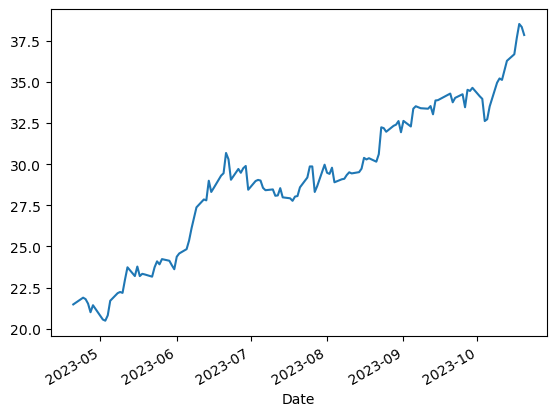

In [5]:
coluna_fechamento.plot()

## Gerando as estatísticas
- **cotação máxima:** max()
- **cotação mínima:** min()
- **cotação atual:** é a última linha. Para acessar basta colocar [-1]

In [6]:
cotacao_maxima = coluna_fechamento.max()
cotacao_minima = coluna_fechamento.min()
cotacao_atual = coluna_fechamento[-1]

print(cotacao_maxima)
print(cotacao_minima)
print(cotacao_atual)

38.52000045776367
20.486406326293945
37.849998474121094


## Enviando e-mail de forma automática
- Processo de enviar um e-mail passo a passo:
    - abrir uma nova aba no navegador (podemos usar o atalho CTRL + T)
    - digitar o endereço do gmail e pressionar enter
    - Selecionar o botão de escrever
    - digitar o endereço de e-mail do destinatário
    - mudar para o campo Assunto (podemos clicar no campo ou clicar no TAB)
    - digitar o assunto
    - mudar para o campo principal do e-mail (podemos clicar no campo ou clicar no TAB)
    - escrever a mensagem
    - Clicar em Enviar (CTRL + ENTER)

### Criando os dados do e-mail para serem enviados

In [7]:
destinatario = "teste@gmail.com"
assunto = "Análise diária"

mensagem = f"""
Prezado Gestor,

Segue abaixo as análises da ação {codigo_acao} dos últimos seis meses:

Cotação máxima: R${round(cotacao_maxima, 2)}
Cotação mínima: R${round(cotacao_minima, 2)}
Cotação atual: R$ {round(cotacao_atual, 2)}

Atenciosamente,
Moisés.
"""

### Mostrando como vai a mensagem no e-mail

In [8]:
# Imprimindo os dados
print(destinatario)
print(assunto)
print(mensagem)

teste@gmail.com
Análise diária

Prezado Gestor,

Segue abaixo as análises da ação PETR4.SA dos últimos seis meses:

Cotação máxima: R$38.52
Cotação mínima: R$20.49
Cotação atual: R$ 37.85

Atenciosamente,
Moisés.



### Automatizando o envio

In [9]:
# Pausa entre as ações do pyautogui
pyautogui.PAUSE = 3

# Abrir uma nova aba
pyautogui.hotkey("ctrl", "t")

# Digitando na aba o endereço do gmail
pyautogui.write("www.gmail.com")
pyautogui.press("enter")

# Abrir o campo de mensagem
pyautogui.hotkey("c")

# Preenchendo o destinatário
pyautogui.write(destinatario)
pyautogui.press("enter")
pyautogui.press("tab")

# Preenchendo o assunto
pyperclip.copy(assunto)
pyautogui.hotkey("ctrl", "v")
pyautogui.press("tab")

# Preenchendo a mensagem
pyperclip.copy(mensagem)
pyautogui.hotkey("ctrl", "v")


# Enviando o e-mail
pyautogui.hotkey("ctrl", "enter")

# Imprimindo mensagem de confirmação do e-mail enviado
pyautogui.alert("E-mail enviado com sucesso!")

'OK'